In [335]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from datetime import timedelta
from datetime import datetime
import seaborn as sns

from math import log

In [367]:
# # https://www.kaggle.com/pavanraj159/olympics-history-1896-2016/data
olympics = pd.read_csv("https://abe-southside-final-project.s3.us-east-2.amazonaws.com/athlete_events.csv",index_col=[0])
olympics.dtypes
olympics.count()

Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [369]:
# # https://www.kaggle.com/pavanraj159/olympics-history-1896-2016/data
# olympics = pd.read_csv('athlete_events.csv')
# olympics.head()
# olympics.count()


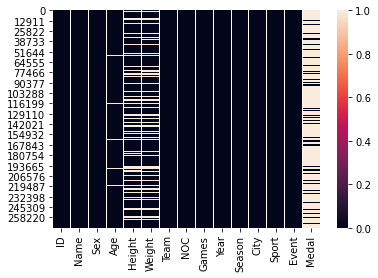

In [370]:
# This data helps us visualize where the null values exist 
sns.heatmap(olympics.isnull())

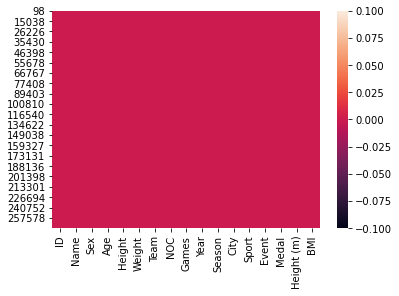

In [371]:
countries = ['USA','BRA','GER','AUS','FRA']
sports = ['Athletics']

olympics = olympics[olympics['NOC'].isin(countries)]
olympics = olympics[olympics['Season'] == 'Summer']
# olympics = olympics[olympics['Sport'].isin(sports)]
# olympics = olympics[olympics['Sex']== 'M']
olympics = olympics[olympics['Height'].notna()]
olympics = olympics[olympics['Age'].notna()]
olympics['Height (m)'] = olympics['Height']/100
olympics = olympics[olympics['Weight'].notna()] 
olympics['BMI'] = round(olympics['Weight']/(olympics['Height (m)']*olympics['Height (m)']),2)
# olympics = olympics[olympics['Medal'] == 'Gold']
# This data helps us visualize where the null values exist 


# wins = ['Gold','Bronze']

# olympics = olympics[olympics['Medal'].isin(wins)]

olympics.loc[(olympics['Medal'] == 'Gold'),'Medal']='Medal'
olympics.loc[(olympics['Medal'] == 'Silver'),'Medal']='Medal'
olympics.loc[(olympics['Medal'] == 'Bronze'),'Medal']='Medal'
olympics.loc[(olympics['Medal'].isna()),'Medal']= 'Non-Medal'

olympics_df = olympics[olympics['Year']< 2016]
olympics_2016 = olympics[olympics['Year'] == 2016]

sns.heatmap(olympics.isnull())

In [372]:
olympics_2016

olympics_2016.groupby(['NOC']).count().sort_values('BMI',ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Height (m),BMI
NOC,,,,,,,,,,,,,,,,
USA,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718
BRA,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581
GER,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535
AUS,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
FRA,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511


In [373]:
olympics_df.head()
# olympics['Weight'].max()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height (m),BMI
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",Non-Medal,1.87,21.73
145,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,Non-Medal,1.89,22.40
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Medal,1.82,25.96
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Medal,1.82,25.96
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Medal,1.65,20.20


Text(0, 0.5, 'Weight')

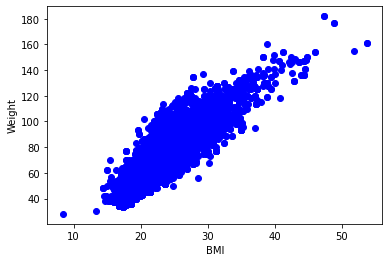

In [374]:
H = olympics_df['Height (m)']
W = olympics_df['Weight']
A = olympics_df['Age']
B = olympics_df['BMI']
M = olympics_df['Medal']

plt.scatter(B,W,c="blue")
plt.xlabel("BMI")
plt.ylabel("Weight")

Text(0, 0.5, 'Height (m)')

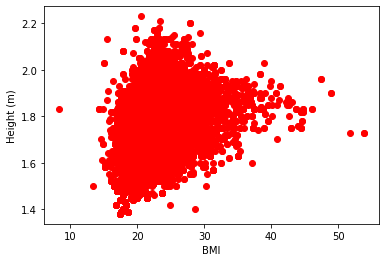

In [375]:
plt.scatter(B,H,c="red")
plt.xlabel("BMI")
plt.ylabel("Height (m)")

Text(0, 0.5, 'Age')

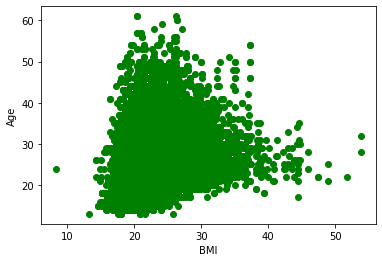

In [376]:
plt.scatter(B,A,c="green")
plt.xlabel("BMI")
plt.ylabel("Age")

No handles with labels found to put in legend.


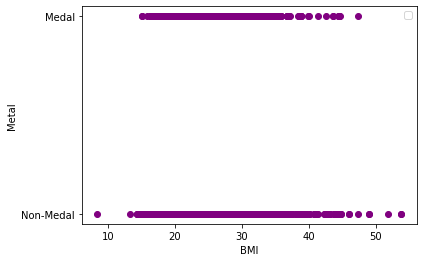

In [377]:
plt.scatter(B,M,c="purple")
plt.xlabel("BMI")
plt.ylabel("Metal")
plt.legend()

plt.show()

In [378]:
olympics_df['Medal'].unique()

array(['Non-Medal', 'Medal'], dtype=object)

### Logistic Regression

In [379]:
X = pd.get_dummies(olympics_df[["Sex", "Age", "Height", "Weight","BMI","NOC"]])
# X = olympics[["BMI","NOC"]]
y = olympics_df["Medal"]
print(X.shape, y.shape)

# plt.scatter(X,y)
X
y

(29204, 11) (29204,)


98        Non-Medal
145       Non-Medal
173           Medal
174           Medal
186           Medal
            ...    
271023    Non-Medal
271026    Non-Medal
271027    Non-Medal
271044    Non-Medal
271107    Non-Medal
Name: Medal, Length: 29204, dtype: object

In [380]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [381]:
X_test

X_2016 = pd.get_dummies(olympics_2016[["Sex", "Age", "Height", "Weight","BMI","NOC"]])
X_2016

y_2016 = olympics_2016["Medal"]
y_2016

175           Medal
282       Non-Medal
704       Non-Medal
773       Non-Medal
781       Non-Medal
            ...    
269697    Non-Medal
269819    Non-Medal
269899    Non-Medal
271019        Medal
271024    Non-Medal
Name: Medal, Length: 2857, dtype: object

In [382]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [383]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7637766516002374
Testing Data Score: 0.764415833447473


In [384]:
predictions = classifier.predict(X_2016)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_2016[:10].tolist()}")

First 10 Predictions:   ['Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal'
 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal']
First 10 Actual labels: ['Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal']


In [385]:
Testing = pd.DataFrame({"Prediction": predictions, "Actual": y_2016}).reset_index(drop=True)
Testing

,Prediction,Actual
0,Non-Medal,Medal
1,Non-Medal,Non-Medal
2,Non-Medal,Non-Medal
3,Non-Medal,Non-Medal
4,Non-Medal,Non-Medal
...,...,...
2852,Non-Medal,Non-Medal
2853,Non-Medal,Non-Medal
2854,Non-Medal,Non-Medal
2855,Non-Medal,Medal


In [386]:
pd.crosstab(Testing['Actual'],Testing['Prediction'])

Prediction,Medal,Non-Medal
Actual,,
Medal,50,600
Non-Medal,30,2177


In [360]:
# Testing[(Testing['Actual'] != 'Others') & (Testing['Prediction'] != 'Others')]
Testing[(Testing['Prediction'] == 'Medal')]
# Testing[(Testing['Prediction'] == 'Non-Medal')]


,Prediction,Actual
13,Medal,Medal
16,Medal,Medal
17,Medal,Medal
18,Medal,Medal
19,Medal,Medal
...,...,...
2511,Medal,Medal
2593,Medal,Medal
2637,Medal,Medal
2675,Medal,Non-Medal


### DECISION TREE

In [361]:
X = pd.get_dummies(olympics_df[["Sex", "Age", "Height", "Weight","BMI","NOC"]])
y = olympics_df["Medal"].values.reshape(-1,1)
print(X.shape, y.shape)
feature_names = X

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

sorted(zip(rf.feature_importances_, feature_names), reverse=True)

(29204, 11) (29204, 1)


[(0.3172622699979365, 'Age'),
 (0.24580178733676786, 'BMI'),
 (0.17956418642906616, 'Weight'),
 (0.1775110289946874, 'Height'),
 (0.034323910920529214, 'NOC_USA'),
 (0.01154628532751996, 'NOC_FRA'),
 (0.007919009936526005, 'Sex_F'),
 (0.0077661597457092954, 'Sex_M'),
 (0.006497108064009466, 'NOC_AUS'),
 (0.00610694857505106, 'NOC_GER'),
 (0.005701304672197175, 'NOC_BRA')]

### Random Forest

In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Create a random forest classifier
rf = rf.fit(X, y)
rf.score(X, y)

# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.3220860222880318, 'Age'),
 (0.2442110968950714, 'BMI'),
 (0.17719421779474828, 'Weight'),
 (0.17700737068678535, 'Height'),
 (0.03522232709992987, 'NOC_USA'),
 (0.011771687456810514, 'NOC_FRA'),
 (0.007899628612562198, 'Sex_F'),
 (0.007525421232881272, 'Sex_M'),
 (0.006044289788472341, 'NOC_AUS'),
 (0.005736248873817291, 'NOC_GER'),
 (0.00530168927088971, 'NOC_BRA')]